# Colour Example

This workshop shows you how you can convert an image into ASCII art with colour.

[Install and activate a virtual environment](https://packaging.python.org/en/latest/guides/installing-using-pip-and-virtual-environments/)

```
python3 -m venv .venv
source .venv/bin/activate
which python
.venv/bin/python
```

Install requirements with pip, if you haven't cloned the repo you can use curl to download the `requirements.txt` file

```
curl https://raw.githubusercontent.com/hevansDev/ascii-booth/main/Workshop/requirements.txt -o requirements.txt
python3 -m pip install -r requirements.txt
```

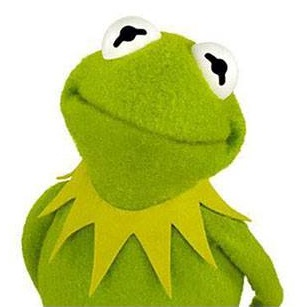

In [1]:
from PIL import Image, ImageDraw, ImageFont

startImage = Image.open("../../images/kermit.jpg")
display(startImage)

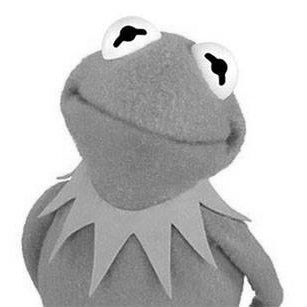

In [2]:
greyImage = startImage.convert("L")
display(greyImage)

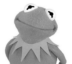

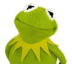

In [3]:
pixelWidth = 72  # How may characters wide the resulting image will be
pixelHeight = 64  # How many characters tall the resulting image will be

resizedGreyImage = greyImage.resize(
    (pixelWidth, pixelHeight), resample=Image.Resampling.BILINEAR
)
display(resizedGreyImage)

# We need a colour version of the image at the same size to get the colours later
resizedStartImage = startImage.resize(
    (pixelWidth, pixelHeight), resample=Image.Resampling.BILINEAR
)
display(resizedStartImage)

In [8]:
greyPixels = resizedGreyImage.load()
startPixels = resizedStartImage.load()

In [9]:
characters = "Ñ@#W$9876543210?!abc;:+=-,._ "  # Taken from https://play.ertdfgcvb.xyz/


def greyscale_to_index(num):
    return int(num / 255 * (len(characters) - 1))

In [10]:
# Get ASCII art text as a 2D array instead of as a multi-line string because we will print each
# character individually so we can set the colour of each character
ascii = []
for y in range(0, resizedGreyImage.height):
    row = []
    for x in range(0, resizedGreyImage.width):
        pixel = greyPixels[x, y]
        i = greyscale_to_index(pixel)
        row.append(str(characters[i]))
    ascii.append(row)

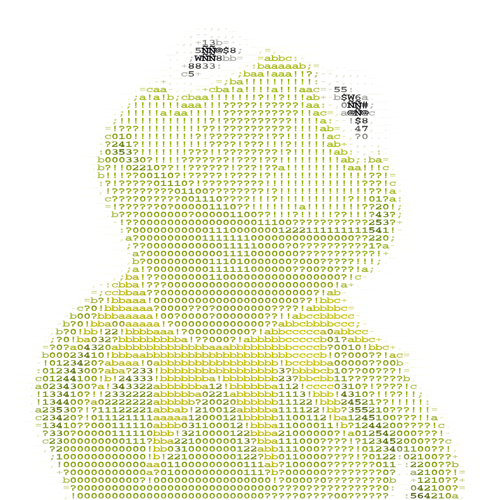

In [12]:
img = Image.new(
    "RGB", (13 * pixelWidth, 20 * pixelHeight), (255, 255, 255)
)  # Blank canvas to draw art onto
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("../../courier.ttf", 24)
yPos = 0
for y in range(0, resizedStartImage.height):
    xPos = 0
    for x in range(0, resizedStartImage.width):
        pixelColour = startPixels[
            x, y
        ]  # Get the RGB value of each pixel and use that to set the colour of the corresponding character
        draw.text((xPos, yPos), ascii[y][x], pixelColour, font=font)
        xPos += 13  # Write the next character 13 pixels to the right
    yPos += 20  # Write the next row of characters down 20 pixels
display(img.resize((500, 500)))